In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [19]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [20]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv',
                 names=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
                        "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"])


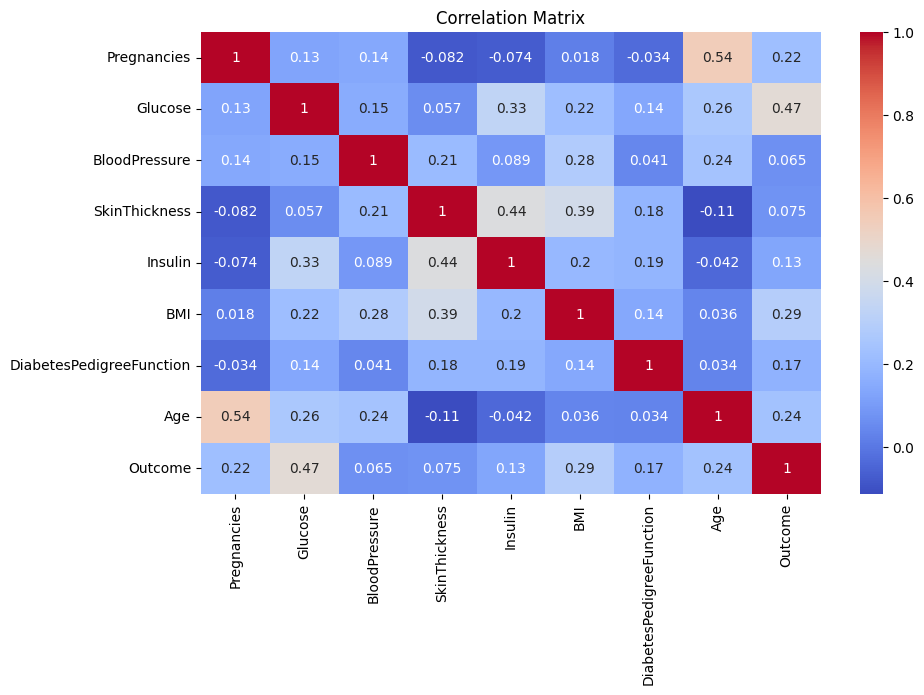

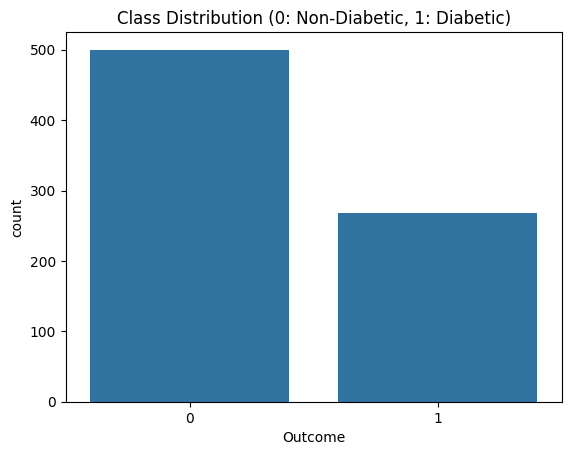

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

sns.countplot(x='Outcome', data=df)
plt.title("Class Distribution (0: Non-Diabetic, 1: Diabetic)")
plt.show()

In [22]:
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [23]:
input_dim = X_train.shape[1]
input_layer = Input(shape=(input_dim,))

encoded = Dense(8, activation='relu')(input_layer)
encoded = Dense(6, activation='relu')(encoded)


decoded = Dense(8, activation='relu')(encoded)
decoded = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
encoder = Model(inputs=input_layer, outputs=encoded)

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train, X_train, epochs=100, batch_size=16, shuffle=True, validation_split=0.2, verbose=0)

In [24]:
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)


model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_encoded.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_encoded, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=0)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

🔍 Accuracy: 0.7337662337662337

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.87      0.81        99
           1       0.68      0.49      0.57        55

    accuracy                           0.73       154
   macro avg       0.71      0.68      0.69       154
weighted avg       0.73      0.73      0.72       154



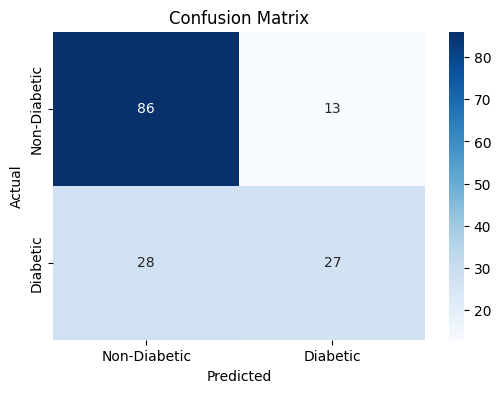

In [25]:
y_pred = (model.predict(X_test_encoded) > 0.5).astype(int)

print("\n🔍 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))


conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Diabetic", "Diabetic"], yticklabels=["Non-Diabetic", "Diabetic"])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()